In [16]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')  

print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)

In [20]:
# Check for missing values
print(data.isnull().sum())
data.dropna(subset=['Rating'], inplace=True)


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [22]:
director_rating = data.groupby('Director')['Rating'].mean()
data['Director_Success_Rate'] = data['Director'].map(director_rating)

genre_rating = data.groupby('Genre')['Rating'].mean()
data['Genre_Average_Rating'] = data['Genre'].map(genre_rating)


In [24]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)


In [32]:
from sklearn.preprocessing import StandardScaler

# Ensure 'Votes' column is treated as string and handle missing values
data['Votes'] = data['Votes'].astype(str).str.replace(',', '').replace('nan', '0').astype(float)

# Clean 'Duration' column to extract numeric values (e.g., '109 min' -> 109)
data['Duration'] = data['Duration'].str.replace(' min', '').replace('nan', '0').astype(float)

# Scale numerical features
scaler = StandardScaler()
data[['Votes', 'Duration']] = scaler.fit_transform(data[['Votes', 'Duration']])

# Display transformed data
print(data[['Votes', 'Duration']].head())


      Votes  Duration
1 -0.166400 -0.877264
3 -0.164073 -0.839604
5 -0.095807  0.553806
6 -0.073482  0.365507
8 -0.138990 -1.894077


In [46]:
# Split the Data
from sklearn.model_selection import train_test_split
X = data.drop('Rating', axis=1)
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())

X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

print(X_train.columns)


                                                    Name    Year  Duration  \
8157   Last Chance: The Moment I Finally Embraced the...  (2019) -2.195355   
8455                                    Maan Gaye Ustaad  (1981)       NaN   
14490                                          Tubelight  (2017)  0.139549   
2697                                           Chaalbaaz  (2003) -0.575986   
15470                                   Zindagi Ek Safar  (1988) -0.463007   

          Votes  Director_Success_Rate  Genre_Average_Rating  \
8157  -0.166228               8.150000              5.926360   
8455  -0.165710               5.175758              6.352082   
14490  1.364929               6.133333              6.150000   
2697  -0.165624               4.250000              5.092566   
15470 -0.164245               7.900000              8.050000   

       Genre_Action, Adventure  Genre_Action, Adventure, Biography  \
8157                     False                               False   
8455  

In [50]:
print(data.columns)
# Select specific columns based on your dataset
X_train = data[['Votes', 'Duration', 'Director_Success_Rate', 'Genre_Average_Rating']]


Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director_Success_Rate',
       'Genre_Average_Rating', 'Genre_Action, Adventure',
       'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy',
       ...
       'Actor 3_Zarine Ali', 'Actor 3_Zayed Khan', 'Actor 3_Zebunissa',
       'Actor 3_Zeenat Aman', 'Actor 3_Zeeshan Khan', 'Actor 3_Zeishan Quadri',
       'Actor 3_Zenobia Shroff', 'Actor 3_Zohra', 'Actor 3_Zoya Hussain',
       'Actor 3_Zulfi Sayed'],
      dtype='object', length=12061)


In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are already defined
print("Initial X_train shape:", X_train.shape)
print("Initial y_train shape:", y_train.shape)

# Align X_train and y_train
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

# Handle missing values in X_train (if any)
X_train.fillna(0, inplace=True)

# Scale numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
# Align columns between training and testing sets
X_train_scaled, X_test_scaled = X_train_scaled.align(X_test_scaled, join='inner', axis=1)

print("Training columns:", X_train_scaled.columns)
print("Testing columns:", X_test_scaled.columns)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

print("Model training complete!")



Initial X_train shape: (6335, 4)
Initial y_train shape: (6335,)
Training columns: Index(['Votes', 'Duration', 'Director_Success_Rate', 'Genre_Average_Rating'], dtype='object')
Testing columns: Index(['Votes', 'Duration', 'Director_Success_Rate', 'Genre_Average_Rating'], dtype='object')
Model training complete!


RMSE: 0.8506676841069792
R2 Score: 0.6107697602706603
Accuracy: 57.765151515151516%


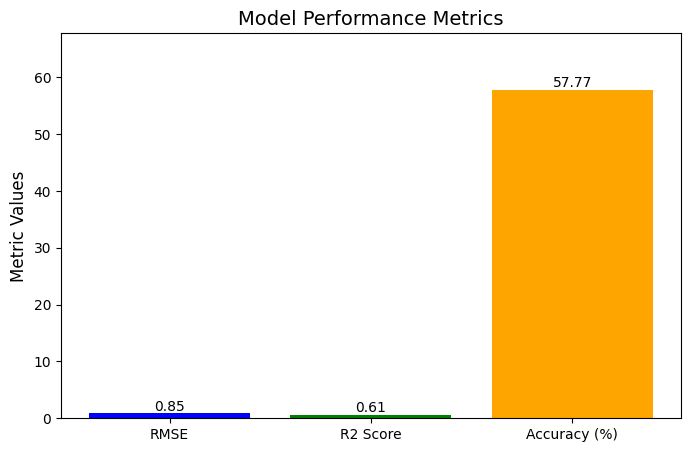

In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train, X_test, y_train, and y_test are already defined.
# Make sure they are aligned (i.e., the same features in the same order)
# For example, if X_train was created from a subset of columns:
# X_train = data[['Votes', 'Duration', 'Director_Success_Rate', 'Genre_Average_Rating']]
# y_train = data['Rating']
#
# And similarly for X_test.

# Reindex X_test to ensure it has the same columns (and order) as X_train
X_test_aligned = X_test.reindex(columns=X_train.columns)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# IMPORTANT: Transform X_test_aligned (which now has exactly the same feature names/order as X_train)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_aligned), columns=X_train.columns)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# For regression, we can define a custom "accuracy" metric;
# Here we use the percentage of predictions within a ±0.5 margin of the actual value
accuracy = np.mean(np.abs(y_test - y_pred) <= 0.5) * 100

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Accuracy: {accuracy}%")

# Visualize metrics using a bar chart
metrics = {'RMSE': rmse, 'R2 Score': r2, 'Accuracy (%)': accuracy}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(names, values, color=['blue', 'green', 'orange'])
plt.title("Model Performance Metrics", fontsize=14)
plt.ylabel("Metric Values", fontsize=12)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(0, max(values) + 10)  # Add some space above the bars
plt.show()
